 <div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>

Алексей, доброго дня! рад приветствовать тебя) <br />
<br />
Меня зовут Николай Шавлюго. <br />И на этом этапе твоего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
    <p>Всё хорошо.</p>
</div>

<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
    <p>Обрати внимание, есть потенциал</p>
</div>

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
    <p>Нужно ещё раз глянуть</p>
</div>
</font><br /><br />
<font color='green'>Моей целью является не "уличить" в не знании, а просто высказать сверху твоих знаний - свой опыт, что бы тебе использовать его для своего дальнейшего успеха) И очень здорово будет, если удастся задавать вопросы, да и вообще - всячески доставать меня, если я по каким-то причинам не приму проект:) При этом, из своего опыта скажу, хорошо и важно, когда переписка ревьюера и студента - сохраняется на следующие проекты и даже на будущую практическую деятельность.<br>
<br> Я сразу же начал общаться на ты:) но если это не очень удобно, то дай знать)) <BR> В ПУТЬ!<br></div>

# Учебный Проект → «Защита Персональных Данных» 🔐

## Цель проекта

> Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.
> 
> Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
    <p>Описание проблематики есть, ОК.</p>
</div>

Импортируем библиотеки 🎒

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from numpy.random import RandomState
from numpy.random import rand

from numpy.linalg import det

from matplotlib import rcParams

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

Настроим вид графиков по+красоте ✨

In [2]:
%config InlineBackend.figure_formats = ['svg']

In [3]:
# style MATPLOTLIBRC
custom_params = {
                'figure.figsize': (10, 6),
                'figure.facecolor': '#232425',
                'figure.dpi': 240,

                'legend.frameon': False,
                'legend.borderpad': 1.4,
                'legend.labelspacing': 0.7,
                'legend.handlelength': 0.7,
                'legend.handleheight': 0.7,

                'axes.facecolor': '#232425',
                'axes.labelcolor': '#EEEEEE',
                'axes.labelpad': 17,
                'axes.spines.left': False,
                'axes.spines.bottom': False,
                'axes.spines.right': False,
                'axes.spines.top': False,
                'axes.grid': False,

                'contour.linewidth': 0.0,

                'xtick.color': '#AAAAAA',
                'ytick.color': '#AAAAAA',
                'xtick.bottom': True,
                'xtick.top': False,
                'ytick.left': True,
                'ytick.right': False,
    
                "lines.color": '#EEEEEE',

                'text.color': '#EEEEEE',
    
                'font.family': 'sans-serif',
                # 'font.sans-serif': [
                #     'Helvetica',
                #     'Verdana',
                #     'Tahoma',
                #     'Trebuchet MS',
                #     'Arial',
                #     'Chevin'
                #     ]
                }

# rcParams.update(custom_params)

In [4]:
# set max columns to none
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

Константы.

In [5]:
RANDOM_SEED = 108108108
RANDOM_NP = RandomState(128) 
dpi_k = custom_params['figure.dpi'] / rcParams['figure.dpi']
px = 1/custom_params['figure.dpi']

Функции.

In [6]:
def baisic_df_info(data_df, title='Basic Info'):
    print(title, end='\n\n')
    print('Дубликатов:',
             len(data_df.loc[data_df.duplicated()].index),
          end='\n\n'
     )
    
    display(
        data_df.info(),
        data_df.sample(5),
        data_df.describe(),
    )

In [7]:
def to_px(size_px):
    px_density = int(
        round(
            size_px * px * dpi_k
        )
    )
    return px_density

In [8]:
def plot_hist(data, title='Histogram', custom_params=custom_params):
    
    num_col = 2
    num_row = int(
            len(data.columns) / num_col
        ) + (len(data.columns) % num_col)
    
    with mpl.rc_context(custom_params):
        fig, axs = plt.subplots(
            nrows=num_row,
            ncols=num_col,
            figsize=(
                to_px(960), to_px(960)),
            tight_layout=True
        )
        
        for n, col_name in enumerate(data.columns):
            ax_row = int(n/2)
            ax_col = n%2
            n_bins = len(data[col_name].unique())
                
            axs[ax_row, ax_col].hist(
                data[col_name],
                bins=n_bins,
                color='forestgreen'
            )
            axs[ax_row, ax_col].set_title(col_name)
        
        fig.suptitle(title, fontsize=16)
        
        if len(data.columns) % num_col:
            fig.delaxes(axs[-1, -1])

        plt.show()

In [9]:
def lin_reg_params(y_title, model, columns):
    print(
    y_title,
    round(model.intercept_, 5),
    sep=' = ',
    end=''
    )
    for k in range(model.n_features_in_):
        if model.coef_[k] > 0:
            print(' + ', end='')
        else:
            print(' - ', end='')
        print(
            abs(round(model.coef_[k], 5)),
            columns[k],
            sep='*',
            end=''
        )
    print()

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
    <p>Ни чёсе:) подготовка. Таааак, что дальше.</p>
</div>

## Загрузка данных

### 1.1. Загрузим файл и изучим данные

In [10]:
try:
    insurance_df = pd.read_csv(
        './datasets/insurance.csv',
    )
    
except FileNotFoundError:
    insurance_df = pd.read_csv(
        'https://code.s3.yandex.net/datasets/insurance.csv',
    )
    print('FYI datasets loaded via url')

FYI datasets loaded via url


In [11]:
baisic_df_info(insurance_df)

Basic Info

Дубликатов: 153

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


None

Пол  Возраст  Зарплата  Члены семьи  Страховые выплаты
1702    1     23.0   18200.0            2                  0
2883    1     49.0   41700.0            0                  2
1436    1     18.0   32800.0            2                  0
3063    0     24.0   64400.0            0                  0
810     0     20.0   35200.0            0                  0

Пол      Возраст      Зарплата  Члены семьи  Страховые выплаты
count  5000.000000  5000.000000   5000.000000  5000.000000        5000.000000
mean      0.499000    30.952800  39916.360000     1.194200           0.148000
std       0.500049     8.440807   9900.083569     1.091387           0.463183
min       0.000000    18.000000   5300.000000     0.000000           0.000000
25%       0.000000    24.000000  33300.000000     0.000000           0.000000
50%       0.000000    30.000000  40200.000000     1.000000           0.000000
75%       1.000000    37.000000  46600.000000     2.000000           0.000000
max       1.000000    65.000000  79000.000000     6.000000           5.000000

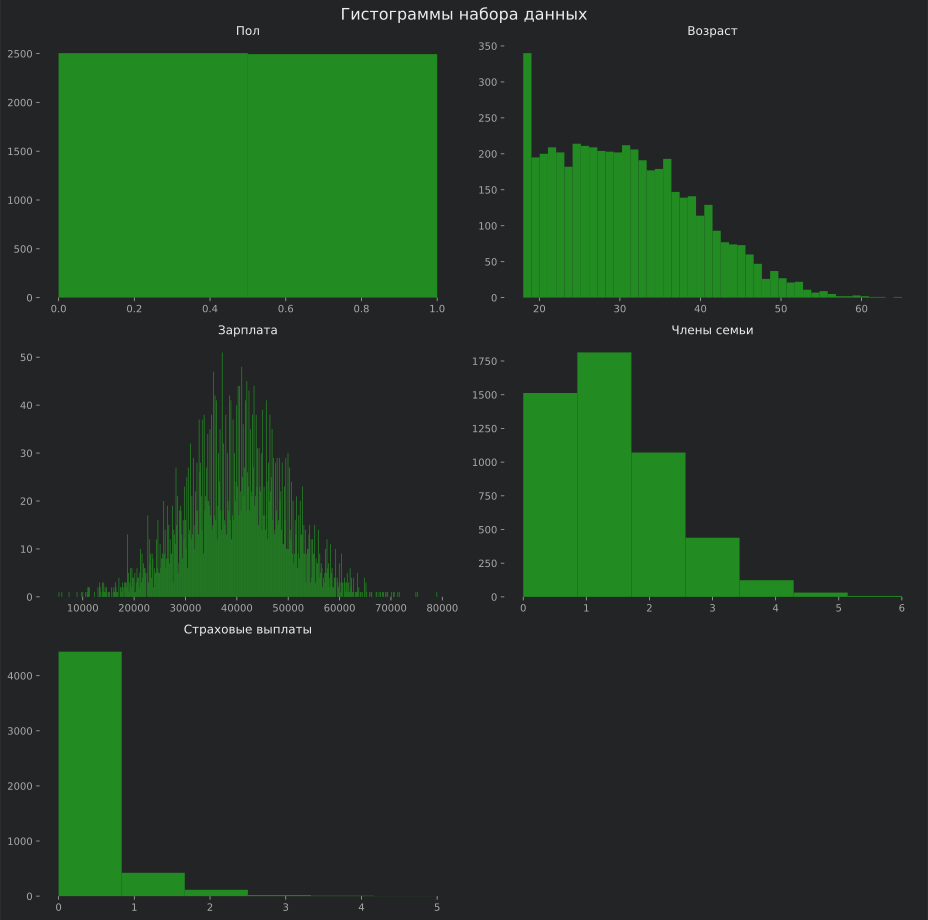

In [12]:
plot_hist(insurance_df, title='Гистограммы набора данных')

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
    <p>Супер!!!!! Тут выводы напрашиваются. Но может дальше, в конце.</p>
</div>

### 1.2. Подготовим данные

Удалим дубликаты.  
Будь у нас `user_id` можно было бы понять дубликаты это или одинаковые данные разных пользователей.  
Рисковать не будем, не велика потеря 153 строки.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>Хорошо.

In [13]:
insurance_df.drop_duplicates(keep='first', inplace=True)

In [14]:
nice_col_names = {
        'Пол': 'sex',
        'Возраст': 'age',
        'Зарплата': 'salary',
        'Члены семьи': 'family_members',
        'Страховые выплаты': 'payments'
    }
insurance_df.rename(
    columns=nice_col_names,
    inplace=True,
)

In [15]:
display(
    list(insurance_df.columns)
)

['sex', 'age', 'salary', 'family_members', 'payments']

In [16]:
target = insurance_df['payments']
target = target.astype('uint8')
features = insurance_df.drop(columns='payments')

In [17]:
features = features.astype(
        {
            'sex': 'uint8',
            'age': 'uint8',
            'salary': 'uint32',
            'family_members': 'uint8',
        },
        errors='raise',
    )

In [18]:
features_train, features_test, target_train, target_test = train_test_split(
        features,
        target,
        test_size=0.25,
        random_state=RANDOM_SEED
    )

In [19]:
mm_scaler = MinMaxScaler()

In [20]:
mm_scaler.fit(features_train)

MinMaxScaler()

MinMaxScaler для `cross_val_score`

In [21]:
mm_scaler_cv = MinMaxScaler()

##### LinearRegression для `cross_val_score`

In [22]:
lin_reg = LinearRegression()

In [23]:
mm_scale_lin_reg = make_pipeline(
    mm_scaler_cv,
    lin_reg
)

In [24]:
folds = KFold(
    n_splits=5,
    shuffle=True,
    random_state=RANDOM_SEED
)
r2_scores = cross_val_score(
    mm_scale_lin_reg,
    features_train,
    target_train,
    scoring='r2',
    cv=folds
)

In [25]:
display(
    r2_scores
)

array([0.44521413, 0.43896842, 0.44454333, 0.44806853, 0.4270044 ])

In [26]:
features_train_scaled = mm_scaler.transform(features_train)

In [27]:
lin_reg.fit(features_train_scaled, target_train)

LinearRegression()

In [28]:
features_test_scaled = mm_scaler.transform(features_test)

In [29]:
target_pred = lin_reg.predict(features_test_scaled)

In [30]:
r2 = r2_score(target_test, target_pred)

In [31]:
display(
    r2
)

0.37767966813347

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>Модельная часть понятна.

## Умножение матриц

> ### Запрограммируйте этот алгоритм, применив матричные операции.

Транспонируем матрицу параметров чтобы многократно увеличить размерность матрицы ключа. Это, конечно, увеличивает время генерации такой матрицы и её проверку на обратимось, но зато грубым подбором|перебором такую шифровку уже не одолеть. Ева будет недовольна.

In [32]:
features_t = np.transpose(features)

In [57]:
features_t

0      1      2      3      4      5      6      7      8     \
sex                 1      0      0      0      1      1      1      1      1   
age                41     46     29     21     28     43     39     25     36   
salary          49600  38000  21000  41700  26100  41000  39700  38600  49700   
family_members      1      1      0      2      0      2      2      4      1   

                 9      10     11     12     13     14     15     16     17    \
sex                 1      1      1      0      0      0      1      1      1   
age                32     25     38     23     21     40     34     26     41   
salary          51700  36600  29300  39500  55000  43700  23300  48900  33200   
family_members      1      1      0      3      0      1      0      2      2   

                 18     19     20     21     22     23     24     25     26    \
sex                 1      1      1      1      0      0      0      1      1   
age                42     27     38     36     41     33     21     47     25   
salary          49700  36900  43500  36100  26600  48700  40400  38400  34600   
family_members      0      0      1      1      0      2      3      3      1   

                 27     28     29     30     31     32     33     34     35    \
sex                 1      1      0      0      1      1      0      0      1   
age                30     19     21     25     40     30     31     19     27   
salary          34800  36800  42200  46300  30300  51000  28100  64800  30400   
family_members      1      0      2      0      0      2      0      2      0   

                 36     37     38     39     40     41     42     43     44    \
sex                 1      0      1      1      1      1      1      0      0   
age                22     27     31     33     42     39     42     20     30   
salary          45300  38300  49500  19400  40200  31700  69200  33100  31600   
family_members      2      0      1      1      0      1      0      1      2   

                 45     46     47     48     49     50     51     52     53    \
sex                 0      0      0      1      0      1      0      1      1   
age                24     26     42     25     28     28     30     29     34   
salary          30400  34500  38700  33100  36600  39600  38600  42400  34600   
family_members      1      1      1      1      1      0      2      0      0   

                 54     55     56     57     58     59     60     61     62    \
sex                 1      0      0      0      1      1      0      0      1   
age                42     46     19     31     20     30     28     38     23   
salary          28100  34900  30500  48900  24200  49900  14300  47000  44800   
family_members      2      1      0      0      3      1      1      1      1   

                 63     64     65     66     67     68     69     70     71    \
sex                 0      0      1      1      1      1      1      1      0   
age                32     27     18     43     37     20     39     42     40   
salary          43800  42700  35400  57200  29600  37400  48100  33700  61800   
family_members      1      3      2      4      2      2      1      1      1   

                 72     73     74     75     76     77     78     79     80    \
sex                 0      1      1      0      0      1      0      1      1   
age                40     32     24     48     37     40     43     29     41   
salary          39400  15600  47000  49500  52600  37600  34900  52500  32700   
family_members      1      2      3      0      0      2      0      3      0   

                 81     82     83     84     85     86     87     88     89    \
sex                 1      0      1      0      0      0      0      1      0   
age                29     31     37     26     25     45     28     24     44   
salary          51600  37400  60900  41800  47400  26500  45900  33100  45300   
family_members      1      2      2    

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>А если сгенерить вот так, как ниже сделано? Так тоже вряд ли кто подберёт. И по размерам меньш.

Z = np.random.normal(size=(X.shape[1], X.shape[1]))

Зададим матрицу `ключ` с проверкой обратимости.

In [33]:
n_col = len(features.index)

In [34]:
run = True
while run:
    key = rand(
        n_col, n_col
    )
    if det(key) != 0:
        run = False

/opt/conda/lib/python3.9/site-packages/numpy/linalg/linalg.py:2158: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


In [58]:
key

array([[0.52801833, 0.99100262, 0.91559794, ..., 0.92377753, 0.81057217,
        0.80195129],
       [0.46981676, 0.68515834, 0.38495752, ..., 0.12401246, 0.99235504,
        0.33378917],
       [0.18086879, 0.41322897, 0.71009907, ..., 0.09467187, 0.40060984,
        0.43637292],
       ...,
       [0.18191256, 0.21324489, 0.84598266, ..., 0.33894229, 0.73904014,
        0.47659203],
       [0.33066683, 0.67355256, 0.29493558, ..., 0.85581536, 0.62755876,
        0.97875011],
       [0.6509156 , 0.96553152, 0.79387433, ..., 0.52033613, 0.29974136,
        0.42152909]])

Умножим параметры на матрицу ключ.

In [35]:
to_alice = np.dot(features_t, key)

In [36]:
plot_hist(
    pd.DataFrame(
        np.transpose(to_alice),
        columns=['sex', 'age', 'salary', 'family_members']
    ),
    title='Гистограммы зашифрованных параметров'
)

> ### Проверьте, что качество линейной регрессии из `sklearn` не отличается до и после преобразования.

Дешифруем матрицу обратно.

In [37]:
features_unencrypted = np.dot(to_alice, np.linalg.inv(key))

In [38]:
features_unencrypted = np.transpose(features_unencrypted)

In [39]:
display(
    features_unencrypted
)

array([[ 1.00000000e+00,  4.10000000e+01,  4.96000000e+04,
         1.00000000e+00],
       [ 2.33058017e-12,  4.60000000e+01,  3.80000000e+04,
         1.00000000e+00],
       [-2.01225703e-11,  2.90000000e+01,  2.10000000e+04,
        -2.45563569e-11],
       ...,
       [ 6.11066753e-13,  2.00000000e+01,  3.39000000e+04,
         2.00000000e+00],
       [ 1.00000000e+00,  2.20000000e+01,  3.27000000e+04,
         3.00000000e+00],
       [ 1.00000000e+00,  2.80000000e+01,  4.06000000e+04,
         1.00000000e+00]])

In [40]:
features_unencrypted = pd.DataFrame(
        features_unencrypted,
        columns=['sex', 'age', 'salary', 'family_members']
    )

In [41]:
display(
    features_unencrypted.head()
)

sex   age        salary  family_members
0  1.000000e+00  41.0  49600.000000    1.000000e+00
1  2.330580e-12  46.0  38000.000000    1.000000e+00
2 -2.012257e-11  29.0  20999.999999   -2.455636e-11
3  3.410605e-12  21.0  41700.000000    2.000000e+00
4  1.000000e+00  28.0  26100.000000   -5.684342e-13

Ох уж этот `python` с его бинарными представлением `float`.  
Вернём типы данных к целым положительным значениям.  
Хотя и без этого модель работает так же как и до шифрования.  
`Проверено` ✍️

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>проверено)

In [42]:
features_unencrypted = features_unencrypted.round(decimals=0)

In [43]:
features_unencrypted = features_unencrypted.astype(
        {
            'sex': 'uint8',
            'age': 'uint8',
            'salary': 'uint32',
            'family_members': 'uint8',
        },
        errors='raise',
    )

In [59]:
features_unencrypted

sex  age  salary  family_members
0       1   41   49600               1
1       0   46   38000               1
2       0   29   21000               0
3       0   21   41700               2
4       1   28   26100               0
...   ...  ...     ...             ...
4842    0   28   35700               2
4843    0   34   52400               1
4844    0   20   33900               2
4845    1   22   32700               3
4846    1   28   40600               1

[4847 rows x 4 columns]

In [44]:
features_unencrypted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4847 entries, 0 to 4846
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   sex             4847 non-null   uint8 
 1   age             4847 non-null   uint8 
 2   salary          4847 non-null   uint32
 3   family_members  4847 non-null   uint8 
dtypes: uint32(1), uint8(3)
memory usage: 33.3 KB


In [45]:
features_unen_train, features_unen_test, target_train, target_test = train_test_split(
        features_unencrypted,
        target,
        test_size=0.25,
        random_state=RANDOM_SEED
    )

In [46]:
features_unen_train_sc = mm_scaler.transform(features_unen_train)
features_unen_test_sc = mm_scaler.transform(features_unen_test)

In [47]:
mm_scaler_cv_unen = MinMaxScaler()

In [48]:
lin_reg_unen = LinearRegression()

In [49]:
mm_scale_lin_reg_unen = make_pipeline(
    mm_scaler_cv_unen,
    lin_reg_unen
)

In [50]:
r2_unen_scores = cross_val_score(
    # mm_scale_lin_reg,
    mm_scale_lin_reg_unen,
    features_unen_train,
    target_train,
    scoring='r2',
    cv=folds
)

In [51]:
print( 
    r2_scores,
    '— R2 CV до шифровки'
)
print(
    r2_unen_scores,
    '— R2 CV после дешифровки'
)

[0.44521413 0.43896842 0.44454333 0.44806853 0.4270044 ] — R2 CV до шифровки
[0.44521413 0.43896842 0.44454333 0.44806853 0.4270044 ] — R2 CV после дешифровки


In [52]:
target_unen_pred = lin_reg_unen.fit(features_unen_train_sc, target_train)

In [53]:
target_unen_pred = lin_reg_unen.predict(features_unen_test_sc)

In [54]:
r2_unen = r2_score(target_test, target_unen_pred)

In [55]:
print( 
    r2,
    '— R2 test до шифровки'
)
print(
    r2_unen,
    '— R2 test после дешифровки'
)

0.37767966813347 — R2 test до шифровки
0.37767966813347 — R2 test после дешифровки


На `test` выборке всё ровно, с точностью до 16 знака.  
Для заново обученной модели и для изначальной.

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
Может не так увидел.. Но вот как понял: сначала были найдены метрики на исходных данных. Потом найдены метреи на дешифрованных данных, т.е. gjxnb на тех же самых - features_unencrypted<br>
    
Тут задача: зашифровать данные, и с ними посчитать метрику  и сравнить с исходными метриками. Они будут тоже одинаковые. Т.е. примерно такой алгоритм задачи:<br>
1) создаём рандомную матрицу<br>
2) проверяем её на обратимость (создаём единичную матрицу)<br>
3) Создаём новую матрицу данных<br>
4) Ищем метрики качества на исходных данных и на преобразованных<br>
5) делаем вывод<br>

> ### Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?

Нет, качество после шифровки и дешифровки не изменилось..

> ### Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

In [56]:
print('Bob', end='\t')
lin_reg_params('Y\u2080', lin_reg, features.columns)
print('Alice', end='\t')
lin_reg_params('Y\u2081', lin_reg_unen, features_unencrypted.columns)

Bob	Y₀ = -0.32279 + 0.01181*sex + 1.75228*age + 0.00935*salary - 0.0766*family_members
Alice	Y₁ = -0.32279 + 0.01181*sex + 1.75228*age + 0.00935*salary - 0.0766*family_members


Параметры равны.

## Алгоритм преобразования

> ### Предложите алгоритм преобразования данных для решения задачи.

Обозначения:
  
- $X$ — матрица признаков
- $K$ — обратимая матрица ключ
- $E$ — еденичная матрица

**1. Транспонируем матрицу признаков**
$$\large
X^T
$$
**2. Генерируем случайную и обратимую матрицу ключ**
$$\large
K
$$
$$
\det(K) \neq 0
$$
**3. Умножим признаки $X$ на матрицу ключ $K$**
$$\large
X \cdot K
$$
**4. Отправляем Алисе**:
- матрицу ключ
- открываем доступ к зашифрованным параметрам
- сообщаем имена столбцов параметров
- сообщаем что для дешифровки нужно $(X \cdot K^{-1})^T$
- чтобы значения параметров вновь стали целыми и положительными применить `.round` и задать типы данных (хотя и без этого почемуто работает корректно)
- можем поделится обученным `scaler`
- можем поделится обученной моделью или гиперпараметрами (если они будут)

> ### Обоснуйте, почему качество линейной регрессии не поменяется.

Свойство транспонирования матриц:
$$\large
(X^T)^T = X
$$
Операция умножения матриц **ассоциативна**:
$$\large
(X \cdot K) \cdot K^{-1} = X \cdot (K \cdot K^{-1})
$$
Обратная матрица:
$$\large
K \cdot K^{-1} = E
$$
$$
при \det(K) \neq 0
$$
Умножение на еденичную матрицу:
$$\large
X \cdot E = E  \cdot X = X
$$
**Таким образом:**
$$\large
X^T \cdot K \cdot K^{-1} = X^T \cdot E = X^T
$$
и далее
$$\large
(X^T)^T = X
$$

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
Верно, у матриц есть такие свойста<br>
- ($A(BC) = (AB)C$); это свойство ассоциативности (сочетательности) матриц<br>
- $(P^T)^{-1} = (P^{-1})^T$; то есть: транспортированная оратная матрица есть обратная матрица транспортированная <br>
- $(AB)^T = B^T A^T$; то есть: транспонированное произведение матриц равно произведению транспонированных матриц <br>
- $(AB)^{-1} = B^{-1} A^{-1}$,то есть: обратная матрица от произведения двух матриц равна обратной матрицы B(второй) к обратной матрице А(первой)<br>
- $P P^{-1} = E$ ; умножение матрицы на свою обратную - есть единичная матрица.<br>
- $(ABC)^{-1} =C^{-1} B^{-1} A^{-1}$<br>
    
И вот ожидается алгебраическое доказательсто на их основе, Чуть подробнее, чем сейчас.<br>
    
Через выражение (при подстановке $w' = ((XP)^T XP)^{-1} (XP)^T y$) надо дойти до $w' = P^{-1}w$ , где $w = (X^T X)^{-1} X^T y$ Это и будет доказательством.<br>
НО!!!!!!!!!!!! При этом $ (X^T X)^{-1}$ - не надо раскрывать, так как для неквадратных матриц ($X$ и $X^T$) обратных матриц не существует

$$
a = Xw = XEw = XPP^{-1}w = (XP)P^{-1}w = (XP)w'
$$

$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$
$$
......
$$

## Итог

В этом учебном проекте нужно было защитить данные клиентов страховой компании «Хоть потоп».  
- разработали такой алгоритм преобразования данных, чтобы было сложно восстановить персональную информацию из зашифрованных данных
- проверили алгоритм в работе:
    - обучили и протестировали модель до шифровки признаков
    - обучили и протестировали модель после шифровки и дешифровки признаков
    - сравнили `R2` моделей (они равны)
    - сравнили `параметры` моделей (они равны)

- обосновали корректность работы алгоритма свойствами матриц

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
Алексей - СУПЕР!!!!<br>
Мне понравился твой подход и твой уровень знаний. Есть только комментарии по самой задаче:<br>
1) Надо сравнить метрики на исходны и зашифрованных данных. <br>
2) Матричное доказательство тоже надо <br>
По обоим вопросам - постарался описать проблематику в тексте.<br>
    
И есть предложение по генерации - посмотри, пожалуйста. Там получается абсолютно случайныке значения.<br>

Cпасибо. БУДУ ЖДАТЬ!
    

🔆